In [230]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

In [236]:
train_tweets = pd.read_csv('train_tweets.csv')

In [237]:
train_tweets['text'].head()

0    this is ridiculous       been on hold almost 4...
1    thanks to  and  that was a very quick fix for ...
2                why do they have to be for ladies?   
3    oof   someone at target marketing apparently d...
4    is the brightest stars target edition only in ...
Name: text, dtype: object

In [233]:
# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
train_tweets['text'] = train_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [234]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
train_tweets.loc[:,"tokens"] = train_tweets.loc[:,"text"].apply(tokenizer.tokenize)

In [235]:
train_tweets['source'][:].unique()

array(['@asktarget', '@walmarthelp', '@amazonhelp', '@dellcares',
       '@applesupport', '@microsofthelps', '@fedexhelp', '@upshelp',
       '@uspshelp', '@linkedinhelp', '@comcastcares', '@askamex',
       '@@askmastercard', '@askvisa', '@spotifycares', '@dropboxsupport',
       '@fordservice', '@hondacustsvc', '@nikesupport', '@steamsupport',
       '@vzwsupport', '@tmobilehelp', '@attcares', '@sprintcare',
       '@target', '@walmart', '@amazon', '@dell', '@apple', '@microsoft',
       '@fedex', '@ups', '@usps', '@linkedin', '@comcast',
       '@americanexpress', '@mastercard', '@visa', '@spotify', '@dropbox',
       '@ford', '@honda', '@nike', '@steam_games', '@verizon', '@tmobile',
       '@att', '@sprint'], dtype=object)

In [188]:
#clean_questions = pd.read_csv('clean_questions.csv')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def tv(data):
    vectorizer = TfidfVectorizer()
    emb = vectorizer.fit_transform(data)
    return emb, vectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer


train_tweets = train_tweets.dropna('rows','any')

list_corpus = train_tweets["text"].tolist()
list_labels = train_tweets["class_label"].tolist()

tf_corpus,tfidf_vectorizer = tv(list_corpus)

X_train_counts, X_test_counts, y_train, y_test = train_test_split(tf_corpus, list_labels, test_size=0.2, random_state=40)



#X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
#                                                                                random_state=40)

#X_train_counts, vectorizer = cv(X_train)

#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#X_test_counts = vectorizer.transform(X_test)
#X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

#X_train_tfidf,tfdif_vectorizer = tv(X_train)
#X_test_tfidf = tfidf_vectorizer.fit_transform(X_test)
#X_train_counts = X_train_tfidf
#X_test_counts = X_test_tfidf



ModuleNotFoundError: No module named 'gettesttweets'

[0, 1, 1, 1, 1]
[0, 1, 1, 1, 1]


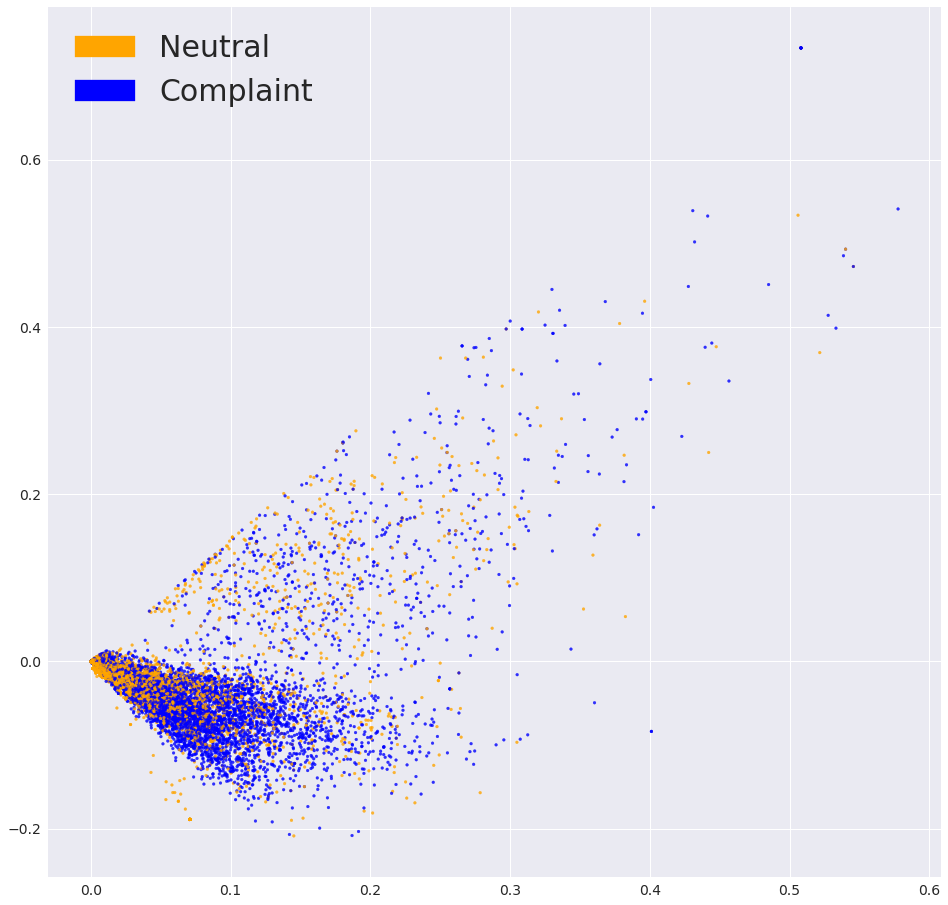

In [167]:


from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        print(color_column[:5])
        print(test_labels[:5])
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=color_column, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Neutral')
            green_patch = mpatches.Patch(color='blue', label='Complaint')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()



In [208]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, penalty='l2',class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [205]:
# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [206]:
from sklearn.model_selection import GridSearchCV
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train_counts, y_train)

In [207]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


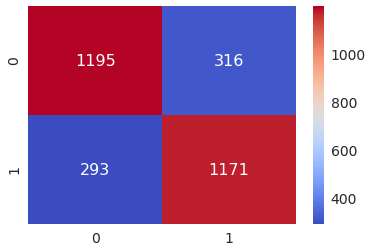

In [209]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted_counts)
confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
#cmap='binary' switch to make it BW
sn.set(font_scale=1.4)#for label size
sn.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16},fmt='g', cmap='coolwarm')# font size)

In [170]:



#Extracting the top 20 most influencial features (aka words) from the model:
def show_most_informative_features(vect, clf, n=20):
    feature_names = vect.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
show_most_informative_features(tfidf_vectorizer, clf, n=20)




	-7.5938	saw            		4.7154	channels       
	-5.4222	meters         		4.6892	resistant      
	-5.0679	satisfying     		4.6229	epicfail       
	-5.0618	searching      		4.2942	hang           
	-4.9521	fckin          		4.1343	notification   
	-4.8811	sensors        		4.1200	problem        
	-4.8307	meat           		4.1193	help           
	-4.8054	buzzing        		4.0970	itunes         
	-4.7773	headed         		4.0760	froze          
	-4.7706	occurred       		4.0535	unacceptable   
	-4.7352	nintendo       		4.0241	adblock        
	-4.7119	expired        		3.9968	am             
	-4.5852	horseshit      		3.9805	quiztimemorningswithamazon
	-4.5210	doomed         		3.9774	tweeted        
	-4.4185	staying        		3.9600	tryna          
	-4.4096	disturbing     		3.9550	comcast        
	-4.3475	government     		3.9462	deadass        
	-4.2446	blatant        		3.9370	renew          
	-4.1994	cont           		3.9333	july           
	-4.1507	recognise      		3.9086	hi             


In [180]:
test_tweets = pd.read_csv('test_tweets.csv')
def clean_text(df,text_field):     
    # taken from 'How to Solve 90% of NLP Problems'      
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n\(\)]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    df = df.fillna('')
    return df
test_tweets = clean_text(test_tweets,'text')
list_corpus = test_tweets["text"].tolist()
list_corpus[:5]

['hey  i love your decision to donate 100  unused food to charity in us!   amp  i want to know   when will you do this in uk?',
 'had my first psl of the season, and someone paid it forward and purchased my afternoon treat  ',
 "hey  isn't it about time you sponsor your favorite starbucks drinker   hyungwon of kpop group    ",
 'hey  i love your decision to donate 100  unused food to charity in us!   amp  i want to know   when will you do this in uk?',
 'ohk i wanna try new drinks at  what s goodies ppl?']

In [189]:


# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
#test_tweets['text'] = test_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
test_tweets.loc[:,"tokens"] = test_tweets.loc[:,"text"].apply(tokenizer.tokenize)

def tv(data):
    vectorizer = TfidfVectorizer()
    emb = vectorizer.fit_transform(data)
    return emb, vectorizer

test_tweets = test_tweets.dropna('rows','any')
test_list = test_tweets["text"].tolist()
test_corpus = tfidf_vectorizer.transform(test_list)

test_list[:5]

['hey  i love your decision to donate 100  unused food to charity in us!   amp  i want to know   when will you do this in uk?',
 'had my first psl of the season, and someone paid it forward and purchased my afternoon treat  ',
 "hey  isn't it about time you sponsor your favorite starbucks drinker   hyungwon of kpop group    ",
 'hey  i love your decision to donate 100  unused food to charity in us!   amp  i want to know   when will you do this in uk?',
 'ohk i wanna try new drinks at  what s goodies ppl?']

In [194]:
initial_tweets=pd.read_csv('test_tweets.csv')
y_result = clf.predict(test_corpus)
for i in range(len(y_result)):
    foo = tfidf_vectorizer.inverse_transform(test_corpus[i])
    bar = initial_tweets.loc[i,'text']
    if y_result[i] == 1:
        print(bar,y_result[i])
initial_tweets['result']=y_result
excel_writer = pd.ExcelWriter('StarbucksTest.xlsx')
initial_tweets.to_excel(excel_writer,'Sheet1')
excel_writer.save()
#for f in foo:
#    print(f)

#print(foo)

Hey @Starbucks, isn't it about time you sponsor your favorite Starbucks drinker - Hyungwon of Kpop group @OfficialMonstaX??? 😊 https://t.co/VvrElsW9Uk 1
#pumpkin spice Time is here ! @starbucks #almostskiseason #coffee #likefollie #listen https://t.co/3K8QdtwKqR @ Clearwater, Florida https://t.co/HIlKgxgXyV 1
I didn't specify hot and they didn't ask and I'm very sad because I have class and I couldn't wait for them to remake it. It doesn't even taste like a PSL. 😩 @starbucks @ Target Store Santa-Fe https://t.co/sjWwiqBi4L 1
GUYS I GOT MY STARBUCKS AND IT WAS GOLDEN HOUR TOO ☀️ I MUSTVE BEEN BLESSED CAUSE I TWEETED ABOUT @Starbucks EARLIER LOL 😂 https://t.co/lpkHJJsvBD 1
A year wiser and stronger! I am aging gracefully! What else is great on birthdays? Of course, #birthdayfreebies? I have long list of freebies and this is one of my favorites! I know, I am so easy to please. Thank you ⁦@Starbucks⁩ ☕️ #freebies #Birthday #birthdaygirl https://t.co/qNzPt6gzyf 1
Why do @Starbucks never have

In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.799, precision = 0.814, recall = 0.799, f1 = 0.800


In [14]:
import gensim
from gensim.test.utils import datapath, get_tmpfile,temporary_file
from gensim.models import KeyedVectors

from gensim.scripts.glove2word2vec import glove2word2vec


#glove_path = "glove.twitter.27B.100d.txt"
#glove_file = datapath(glove_path)
#transform glove to word2vec
#with temporary_file("temp.txt") as tmp_file:
#    glove2word2vec(glove_path, tmp_file)
word2vec_path = "/home/rcarns/Untitled Folder/GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
#word2vec = KeyedVectors.load_word2vec_format(word2vec_file)


In [120]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = train_tweets['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)


In [195]:


embeddings = get_word2vec_embeddings(word2vec, train_tweets)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)



[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]


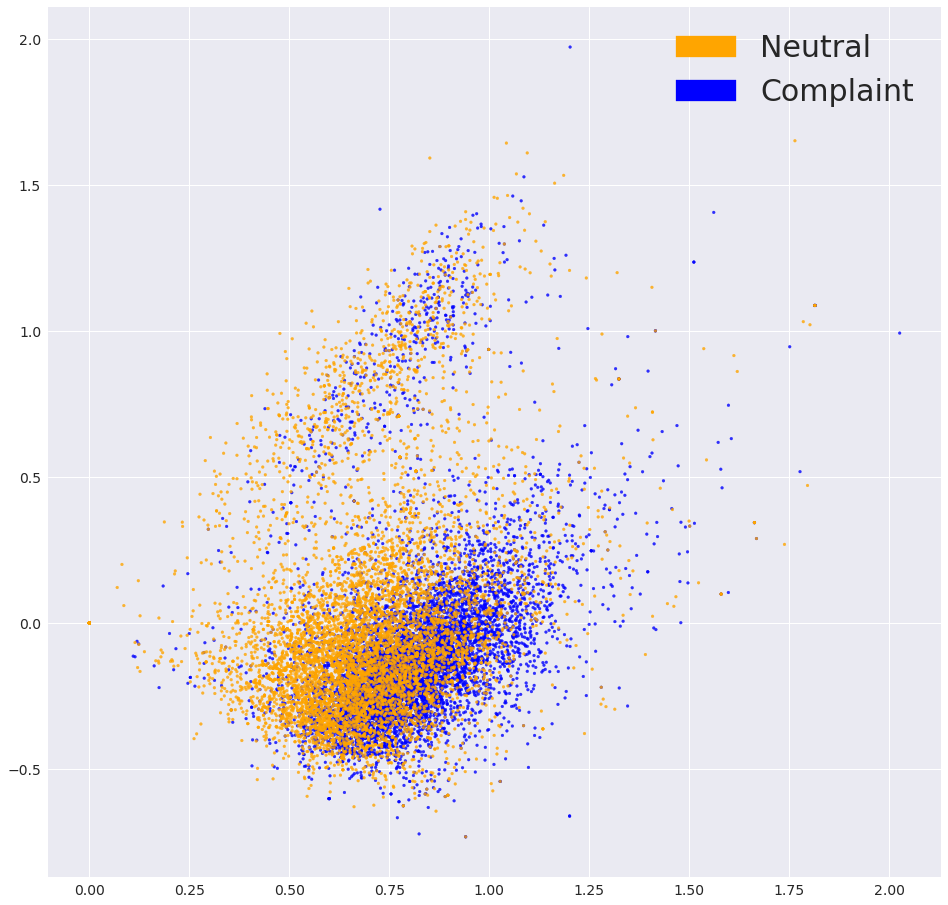

In [196]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [199]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [200]:


accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))



accuracy = 0.765, precision = 0.767, recall = 0.765, f1 = 0.765


In [437]:
from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
clf_w2v = MultinomialNB().fit(X_train_word2vec, y_train_word2vec)
#clf = SVC(kernel='linear').fit(X_train_counts, y_train)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

n_right = 0
for i in range(len(y_predicted_word2vec)):
    if float(y_predicted_word2vec[i]) == y_test_word2vec[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(y_test_word2vec)) * 100)))

ValueError: Input X must be non-negative

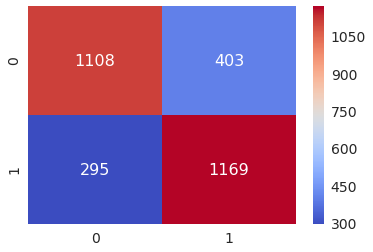

In [201]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
#cmap='binary' switch to make it BW
sn.set(font_scale=1.4)#for label size
sn.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16},fmt='g', cmap='coolwarm')# font size)

In [81]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(train_tweets["text"].tolist())
sequences = tokenizer.texts_to_sequences(train_tweets["text"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(train_tweets["class_label"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 31068 unique tokens.
(31069, 300)


In [89]:
from keras.layers import Dense, Input, Flatten, Dropout,Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [90]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(train_tweets["class_label"].unique())), False)

In [91]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

Train on 13895 samples, validate on 3473 samples
Epoch 1/3
13895/13895 [==============================] - 18s 1ms/step - loss: 0.5477 - acc: 0.7213 - val_loss: 0.4705 - val_acc: 0.7662
Epoch 2/3
13895/13895 [==============================] - 17s 1ms/step - loss: 0.4309 - acc: 0.7901 - val_loss: 0.4583 - val_acc: 0.7691
Epoch 3/3
13895/13895 [==============================] - 18s 1ms/step - loss: 0.3945 - acc: 0.8127 - val_loss: 0.4499 - val_acc: 0.7803
